### QED-C Application-Oriented Benchmarks - QSim Version

In [1]:
min_qubits=2
max_qubits=12
skip_qubits=1
max_circuits=3
num_shots=1000

backend_id="dm_simulator"
#backend_id="statevector_simulator"

#hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = {}

# # ==========================
# # *** If using IBMQ hardware, run this once to authenticate
# from qiskit import IBMQ
# IBMQ.save_account('YOUR_API_TOKEN_HERE')

# # *** If you are part of an IBMQ group, set hub, group, and project name here
# hub="YOUR_HUB_NAME"; group="YOUR_GROUP_NAME"; project="YOUR_PROJECT_NAME"

# # *** This example shows how to specify an IBMQ backend using a known "backend_id"
# exec_options = { "optimization_level":3, "use_sessions":True, "resilience_level":1}
# backend_id="ibmq_belem"

# # ==========================
# # *** If using Azure Quantum, use this hub identifier and specify the desired backend_id
# # Identify your resources with env variables AZURE_QUANTUM_RESOURCE_ID and AZURE_QUANTUM_LOCATION
# hub="azure-quantum"; group="open"; project="QED-C App-Oriented Benchmarks - Qiskit Version"
# backend_id="<YOUR_BACKEND_NAME_HERE>"

# # ==========================
# The remaining examples illustrate other backend execution options

# # An example using IonQ provider
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()   # Be sure to set the QISKIT_IONQ_API_TOKEN environment variable
# provider_backend = provider.get_backend("ionq_qpu")
# backend_id="ionq_qpu"

# # An example using BlueQubit provider
# import os, bluequbit, _common.executors.bluequbit_executor as bluequbit_executor
# provider_backend = bluequbit.init()
# backend_id="BlueQubit-CPU"

# # An example using a typical custom provider backend (e.g. AQT simulator)
# import os
# from qiskit_aqt_provider import AQTProvider
# provider = AQTProvider(os.environ.get('AQT_ACCESS_KEY'))    # get your key from environment
# provider_backend = provider.backends.aqt_qasm_simulator_noise_1
# backend_id="aqt_qasm_simulator_noise_1"

# # Fire Opal can be used to manage executions on other backends, as illustrated here
# import _common.executors.fire_opal_executor as fire_opal_executor
# from _common.executors.fire_opal_executor import FireOpalBackend
# ibm_backend_id = "ibmq_jakarta"
# backend_id = f"fire_opal_{ibm_backend_id}"
# provider_backend = FireOpalBackend(ibm_backend_id=ibm_backend_id, hub=hub, group=group, project=project, token=token)
# exec_options = {"executor": fire_opal_executor.run}


In [2]:
import sys

sys.path[1:1] = [ "_common", "_common/qsim" ]

import execute as ex

# noise parameters for dm-simulator (introduce noise by changing the values)
options_noise = {
    'plot': False,
    "thermal_factor": 0.9,
    'show_partition': False,
    "decoherence_factor": 1.0,
    "depolarization_factor": 0.9,
    "bell_depolarization_factor": 1.0,
    "decay_factor": 1.0,
    "rotation_error": {'rx': [1.0, 0.0], 'ry': [1.0, 0.0], 'rz': [1.0, 0.0]},  # Default values [1.0, 0.0]
    "tsp_model_error": [1.0, 0.0],
}

ex.options_noise = options_noise


In [3]:
# Custom optimization options can be specified in this cell (below is an example)

# # Example of pytket Transformer
# import _common.transformers.tket_optimiser as tket_optimiser
# exec_options.update({ "optimization_level": 0, "layout_method":'sabre', "routing_method":'sabre', "transformer": tket_optimiser.high_optimisation })

# # Define a custom noise model to be used during execution
# import _common.custom.custom_qiskit_noise_model as custom_qiskit_noise_model
# exec_options.update({ "noise_model": custom_qiskit_noise_model.my_noise_model() })

# # Example of mthree error mitigation
# import _common.postprocessors.mthree.mthree_em as mthree_em
# exec_options.update({ "postprocessor": mthree_em.get_mthree_handlers(backend_id, provider_backend) })


### If qiskit-provider-aer module not found error is coming, try to uninstall and re-install qiskit-aer module

In [4]:
# pip uninstall qiskit-aer -y

In [5]:
# pip install qiskit-aer

### Deutsch-Jozsa

Deutsch-Jozsa Benchmark Program - QSim
... execution starting at Aug 06, 2024 12:21:35 UTC
DM_SIMULATOR
************
Executing [2] circuits with num_qubits = 3
************
Executing [2] circuits with num_qubits = 4
************
Average Circuit Algorithmic Depth, ξ (xi) for the 3 qubit group = 7, 0.083
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 3 qubit group = 7, 0.071, 1.0
Average Creation, Elapsed, Execution Time for the 3 qubit group = 0.001, 0.048, 0.002 secs
Average Transpiling, Validating, Running Times for group 3 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 3 qubit group = 0.904, 0.872

************
Executing [2] circuits with num_qubits = 5
************
Executing [2] circuits with num_qubits = 6
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 8, 0.088
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 8, 0.071, 1.5
Average Creation, Elapsed, Execution Time for the 4 qubit 

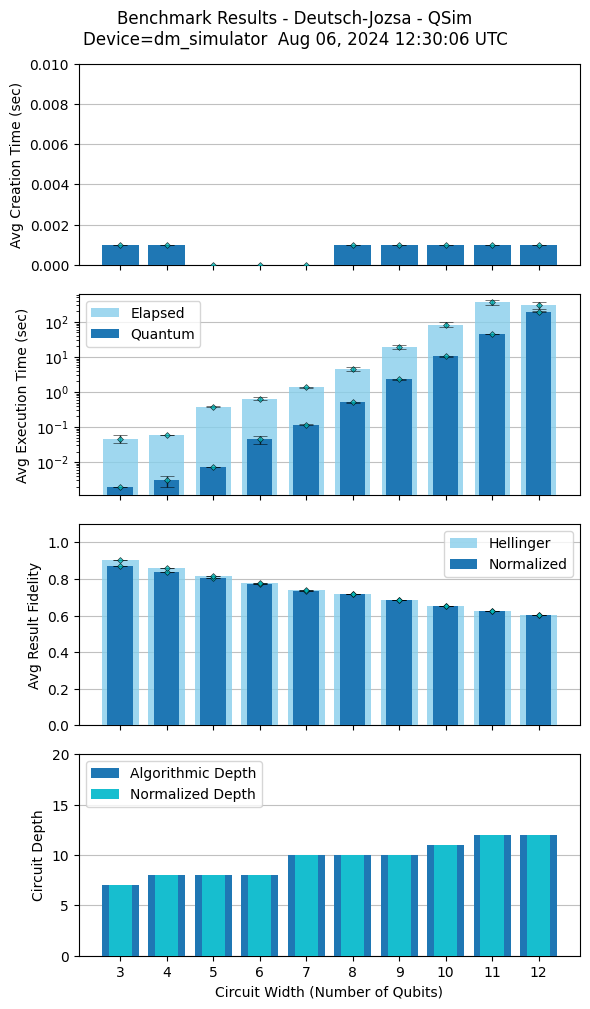

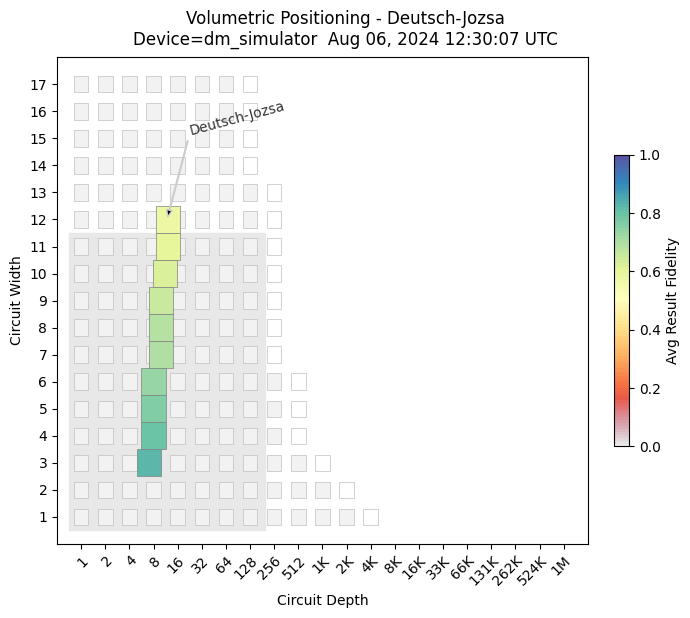

In [6]:
import sys
sys.path.insert(1, "deutsch-jozsa/qsim")
import dj_benchmark
dj_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
               # hub=hub, group=group, project=project, 
                exec_options=exec_options)

### Bernstein-Vazirani - Method 1

Bernstein-Vazirani (1) Benchmark Program - QSim
... execution starting at Aug 06, 2024 12:30:07 UTC
DM_SIMULATOR
************
Executing [3] circuits with num_qubits = 3
************
Executing [3] circuits with num_qubits = 4
************
Average Circuit Algorithmic Depth, ξ (xi) for the 3 qubit group = 6, 0.141
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 3 qubit group = 6, 0.116, 1.333
Average Creation, Elapsed, Execution Time for the 3 qubit group = 0.0, 0.116, 0.001 secs
Average Transpiling, Validating, Running Times for group 3 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 3 qubit group = 0.904, 0.872

************
Executing [3] circuits with num_qubits = 5
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 6, 0.061
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 6, 0.044, 0.667
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.0, 0.468, 0.003 secs
Average Transp

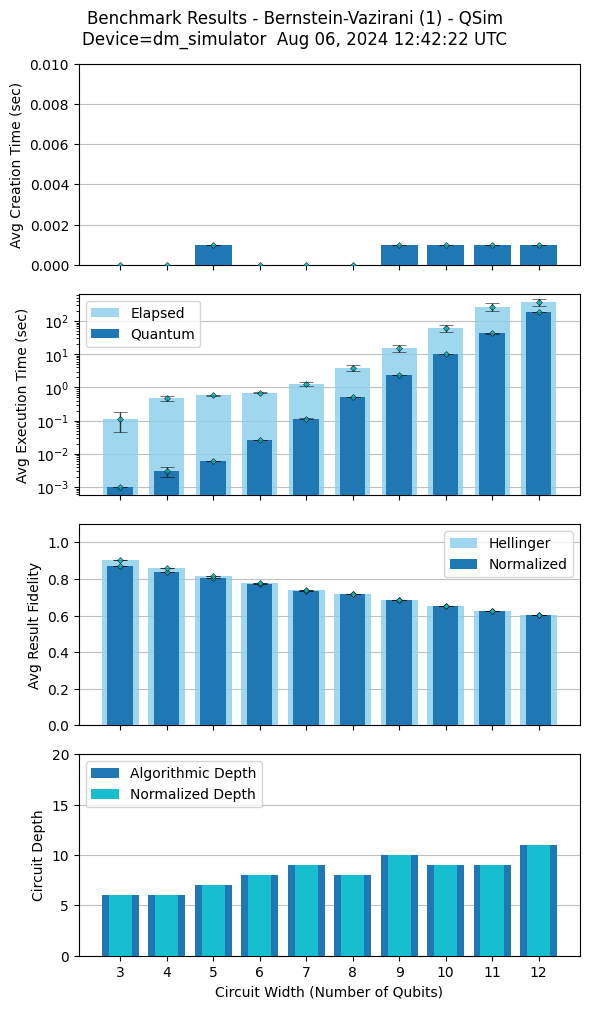

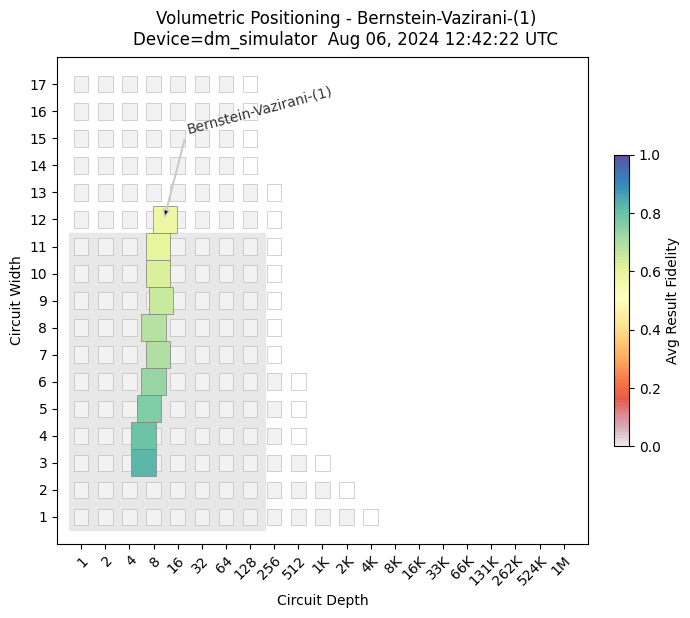

In [7]:
import sys
sys.path.insert(1, "bernstein-vazirani/qsim")
import bv_benchmark
bv_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=1,
                backend_id=backend_id, provider_backend=provider_backend,
              #  hub=hub, group=group, project=project, 
                exec_options=exec_options)

### Bernstein-Vazirani - Method 2

Bernstein-Vazirani (2) Benchmark Program - QSim
... execution starting at Aug 06, 2024 12:42:23 UTC
DM_SIMULATOR
************
Executing [3] circuits with num_qubits = 3
************
Executing [3] circuits with num_qubits = 4
************
Average Circuit Algorithmic Depth, ξ (xi) for the 3 qubit group = 8, 0.095
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 3 qubit group = 8, 0.083, 0.667
Average Creation, Elapsed, Execution Time for the 3 qubit group = 0.0, 0.107, 0.001 secs
Average Transpiling, Validating, Running Times for group 3 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 3 qubit group = 0.25, 0.0

************
Executing [3] circuits with num_qubits = 5
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 14, 0.174
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 17, 0.137, 2.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.0, 0.442, 0.001 secs
Average Transpili

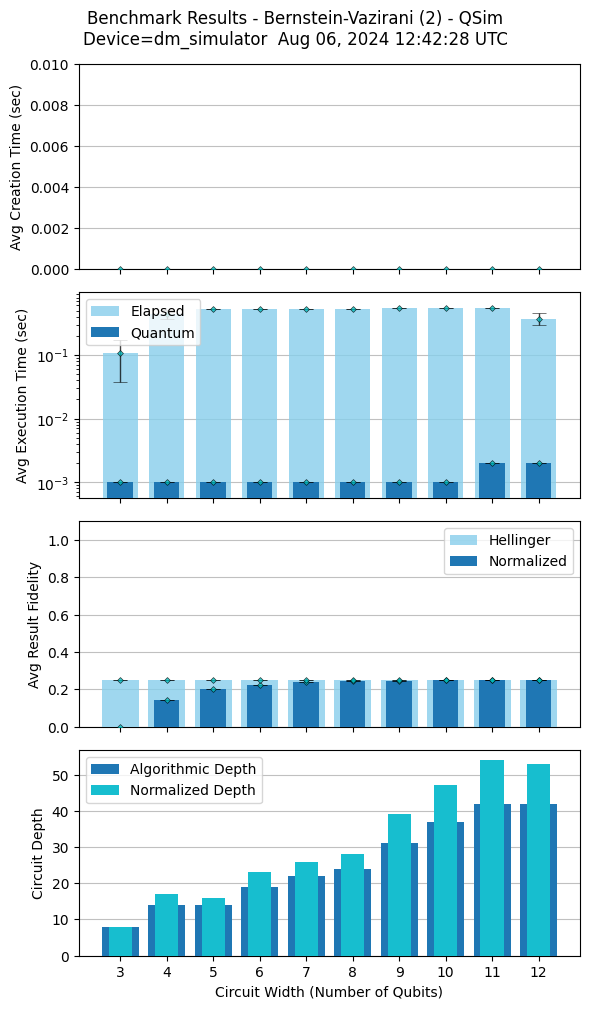

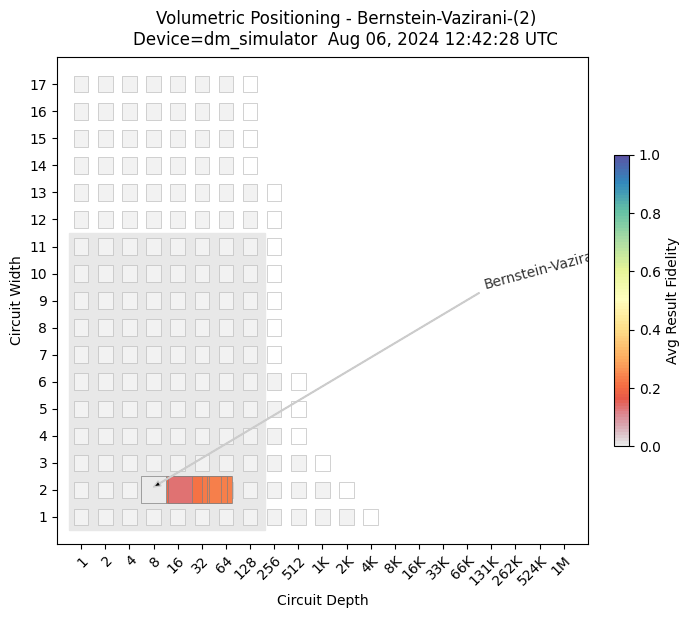

In [8]:
import sys
sys.path.insert(1, "bernstein-vazirani/qsim")
import bv_benchmark
bv_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=2,
                backend_id=backend_id, provider_backend=provider_backend,
               # hub=hub, group=group, project=project, 
                exec_options=exec_options)

### Hidden Shift

Hidden Shift Benchmark Program - QSim
... execution starting at Aug 06, 2024 12:42:29 UTC
DM_SIMULATOR
************
Executing [3] circuits with num_qubits = 2
************
Executing [3] circuits with num_qubits = 4
************
Average Circuit Algorithmic Depth, ξ (xi) for the 2 qubit group = 8, 0.189
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 2 qubit group = 16, 0.091, 2.0
Average Creation, Elapsed, Execution Time for the 2 qubit group = 0.0, 0.127, 0.001 secs
Average Transpiling, Validating, Running Times for group 2 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 2 qubit group = 0.904, 0.872

************
Executing [3] circuits with num_qubits = 6
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 8, 0.215
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 16, 0.094, 4.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.0, 0.508, 0.003 secs
Average Transpiling, Valid

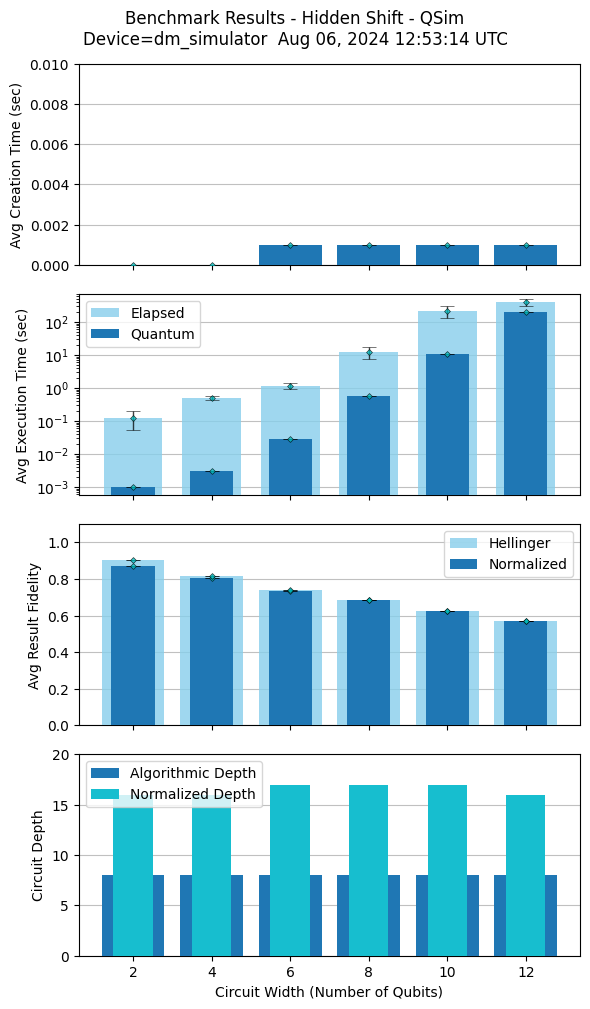

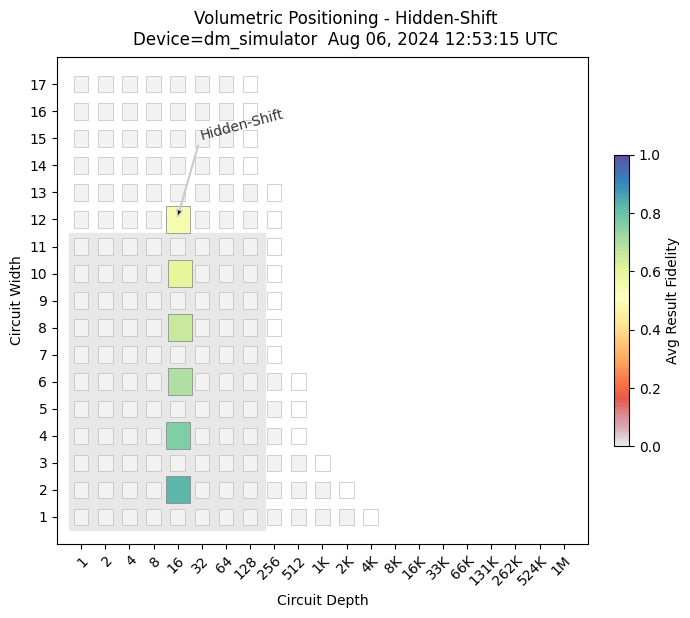

In [9]:
import sys
sys.path.insert(1, "hidden-shift/qsim")
import hs_benchmark
hs_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                #hub=hub, group=group, project=project, 
                exec_options=exec_options)

### Quantum Fourier Transform - Method 1

Quantum Fourier Transform (1) Benchmark Program - QSim
... execution starting at Aug 06, 2024 12:53:16 UTC
DM_SIMULATOR
************
Executing [3] circuits with num_qubits = 2
... number of gates, depth = 11, 8
************
Executing [3] circuits with num_qubits = 3
... number of gates, depth = 19, 14
************
Average Circuit Algorithmic Depth, ξ (xi) for the 2 qubit group = 9, 0.215
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 2 qubit group = 18, 0.207, 4.0
Average Creation, Elapsed, Execution Time for the 2 qubit group = 0.0, 0.127, 0.001 secs
Average Transpiling, Validating, Running Times for group 2 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 2 qubit group = 0.904, 0.872

************
Executing [3] circuits with num_qubits = 4
... number of gates, depth = 29, 22
************
Average Circuit Algorithmic Depth, ξ (xi) for the 3 qubit group = 15, 0.368
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 3 qubit group = 35, 0

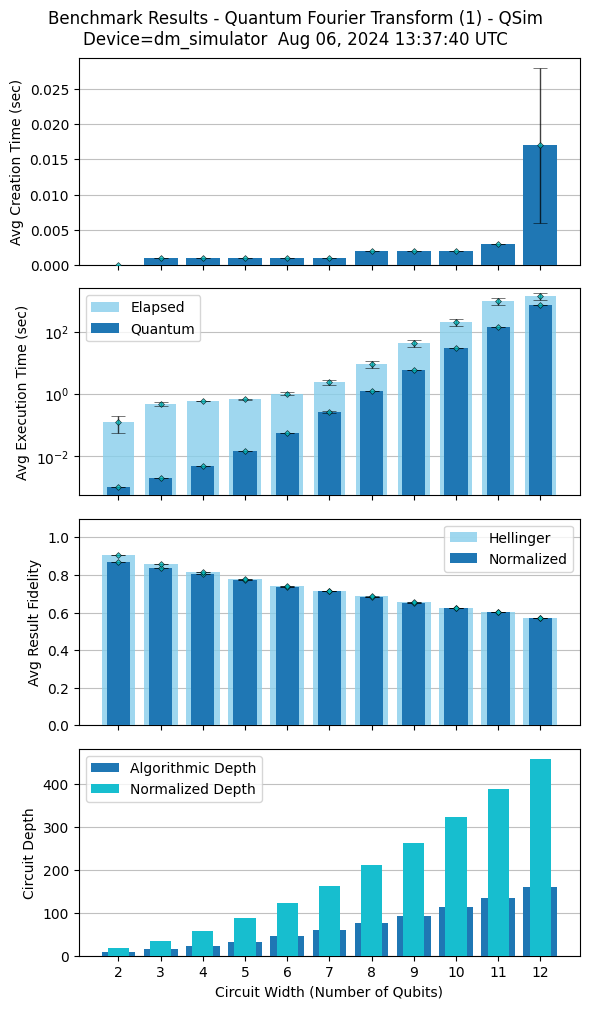

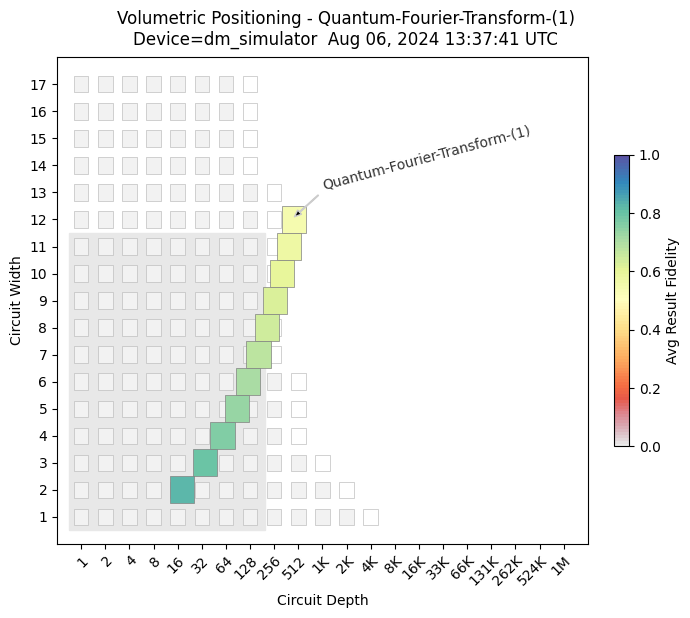

In [10]:
import sys
sys.path.insert(1, "quantum-fourier-transform/qsim")
import qft_benchmark
qft_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=1,
                backend_id=backend_id, provider_backend=provider_backend,
              #  hub=hub, group=group, project=project, 
                exec_options=exec_options)

### Quantum Fourier Transform - Method 2

Quantum Fourier Transform (2) Benchmark Program - QSim
... execution starting at Aug 06, 2024 13:37:42 UTC
DM_SIMULATOR
************
Executing [3] circuits with num_qubits = 2
... number of gates, depth = 9, 5
************
Executing [3] circuits with num_qubits = 3
... number of gates, depth = 15, 8
************
Average Circuit Algorithmic Depth, ξ (xi) for the 2 qubit group = 6, 0.143
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 2 qubit group = 8, 0.262, 2.0
Average Creation, Elapsed, Execution Time for the 2 qubit group = 0.0, 0.116, 0.001 secs
Average Transpiling, Validating, Running Times for group 2 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 2 qubit group = 0.904, 0.872

************
Executing [3] circuits with num_qubits = 4
... number of gates, depth = 22, 12
************
Average Circuit Algorithmic Depth, ξ (xi) for the 3 qubit group = 9, 0.25
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 3 qubit group = 16, 0.327,

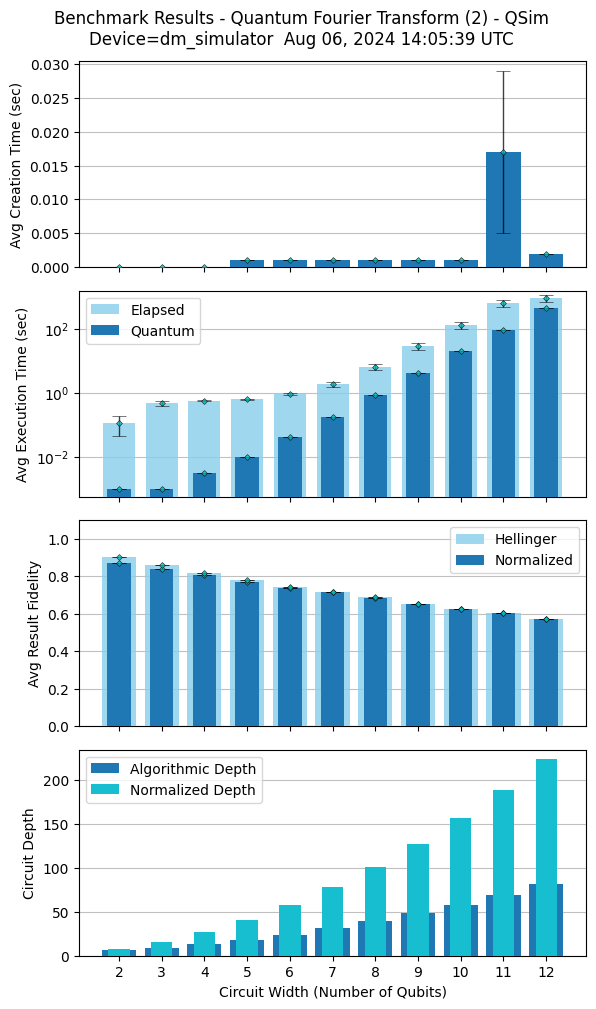

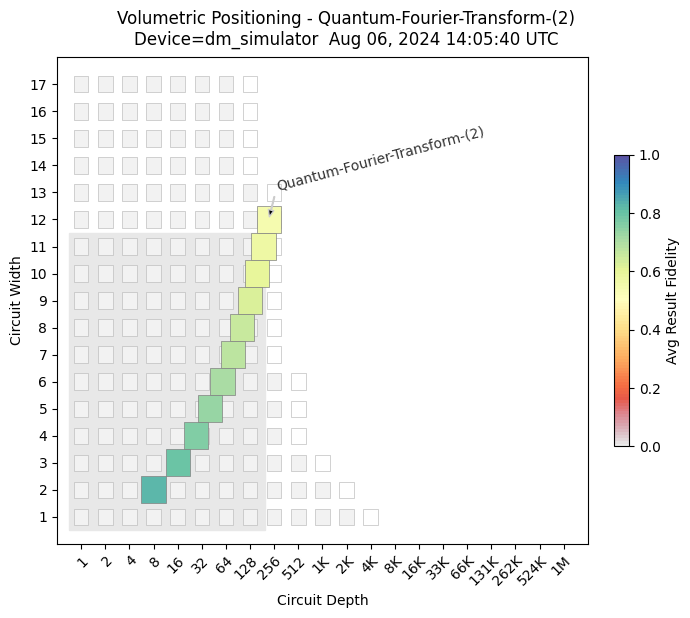

In [11]:
import sys
sys.path.insert(1, "quantum-fourier-transform/qsim")
import qft_benchmark
qft_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=2,
                backend_id=backend_id, provider_backend=provider_backend,
              #  hub=hub, group=group, project=project, 
                exec_options=exec_options)

### Grover

Grover's Search Benchmark Program - QSim
INFO: Grover's Search benchmark is limited to a maximum of 8 qubits.
... execution starting at Aug 06, 2024 14:05:40 UTC
DM_SIMULATOR
************
Executing [3] circuits with num_qubits = 2
************
Executing [3] circuits with num_qubits = 3
************
Average Circuit Algorithmic Depth, ξ (xi) for the 2 qubit group = 13, 0.116
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 2 qubit group = 13, 0.123, 2.0
Average Creation, Elapsed, Execution Time for the 2 qubit group = 0.001, 0.144, 0.001 secs
Average Transpiling, Validating, Running Times for group 2 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 2 qubit group = 0.904, 0.872

************
Executing [3] circuits with num_qubits = 4
************
Average Circuit Algorithmic Depth, ξ (xi) for the 3 qubit group = 25, 0.083
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 3 qubit group = 51, 0.303, 24.0
Average Creation, Elapsed, Execution T

/home/cdac/Desktop/QSim_Repo/QC_Benchmarks_using_dm-simulator/_common/qsim/metrics.py:686: RuntimeWarning: invalid value encountered in sqrt
  total += (np.sqrt(val) - np.sqrt(q_normed[key]))**2


************
Average Circuit Algorithmic Depth, ξ (xi) for the 7 qubit group = 87, 0.048
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 7 qubit group = 5062, 0.484, 3008.0
Average Creation, Elapsed, Execution Time for the 7 qubit group = 0.02, 139.382, 6.767 secs
Average Transpiling, Validating, Running Times for group 7 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 7 qubit group = nan, nan

************
Average Circuit Algorithmic Depth, ξ (xi) for the 8 qubit group = 122, 0.045
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 8 qubit group = 15271, 0.492, 9120.0
Average Creation, Elapsed, Execution Time for the 8 qubit group = 0.008, 243.212, 117.697 secs
Average Transpiling, Validating, Running Times for group 8 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 8 qubit group = 0.269, 0.266

... execution complete at Aug 06, 2024 14:12:23 UTC in 402.735 secs

Sample Circuit:
         ┌───┐ ░ ┌─────────┐┌─

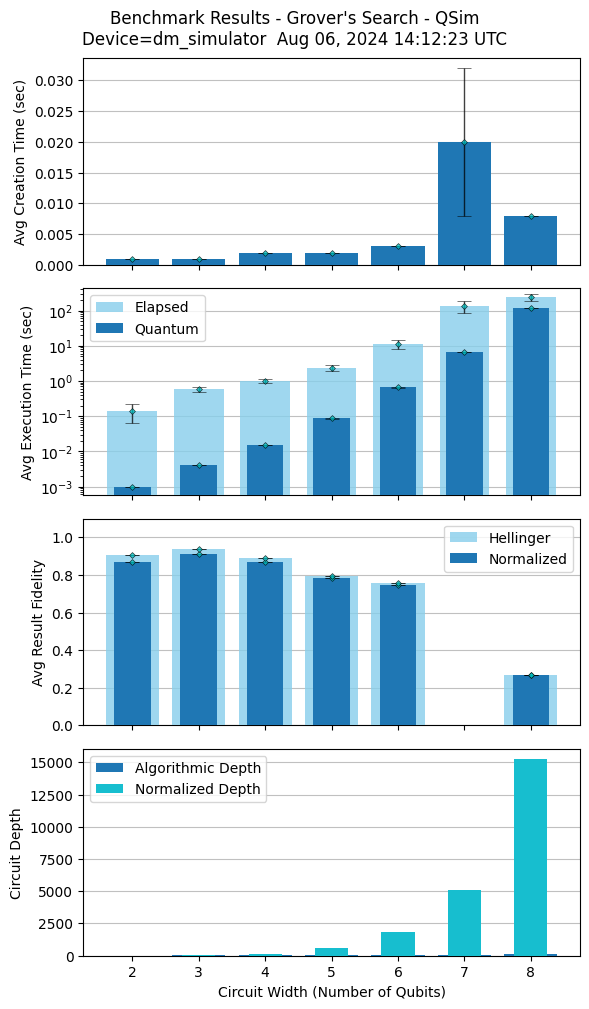

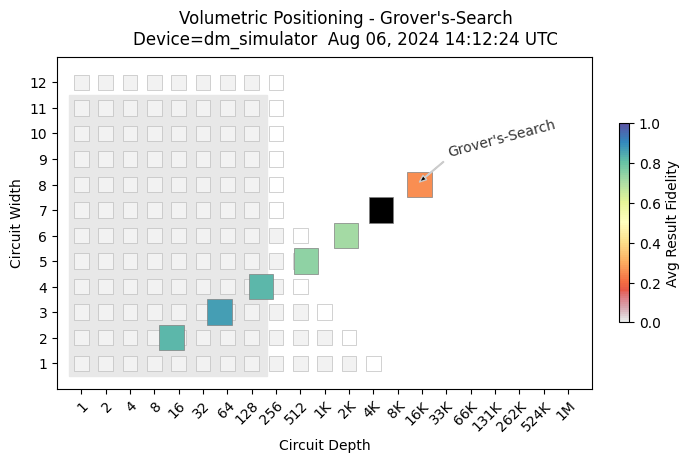

In [12]:
import sys
sys.path.insert(1, "grovers/qsim")
import grovers_benchmark
grovers_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
               # hub=hub, group=group, project=project, 
                exec_options=exec_options)

### Phase Estimation

Phase Estimation Benchmark Program - QSim
... execution starting at Aug 06, 2024 14:12:24 UTC
DM_SIMULATOR
************
Executing [2] circuits with num_qubits = 3
************
Executing [3] circuits with num_qubits = 4
************
Average Circuit Algorithmic Depth, ξ (xi) for the 3 qubit group = 16, 0.316
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 3 qubit group = 14, 0.207, 4.0
Average Creation, Elapsed, Execution Time for the 3 qubit group = 0.002, 0.05, 0.001 secs
Average Transpiling, Validating, Running Times for group 3 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 3 qubit group = 0.904, 0.872

************
Executing [3] circuits with num_qubits = 5
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 27, 0.353
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 30, 0.295, 11.333
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.002, 0.349, 0.003 secs
Average Transp

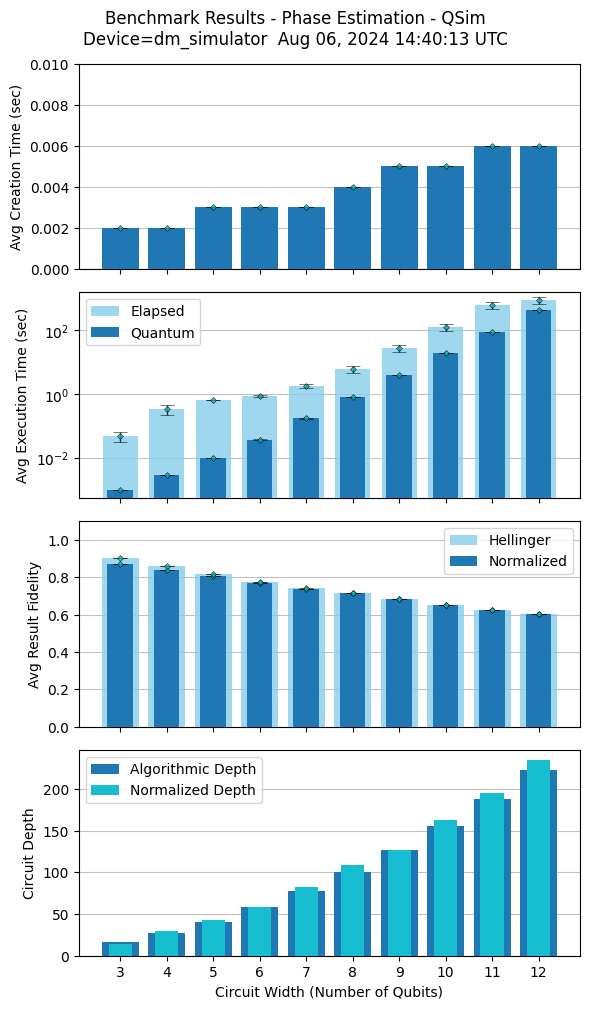

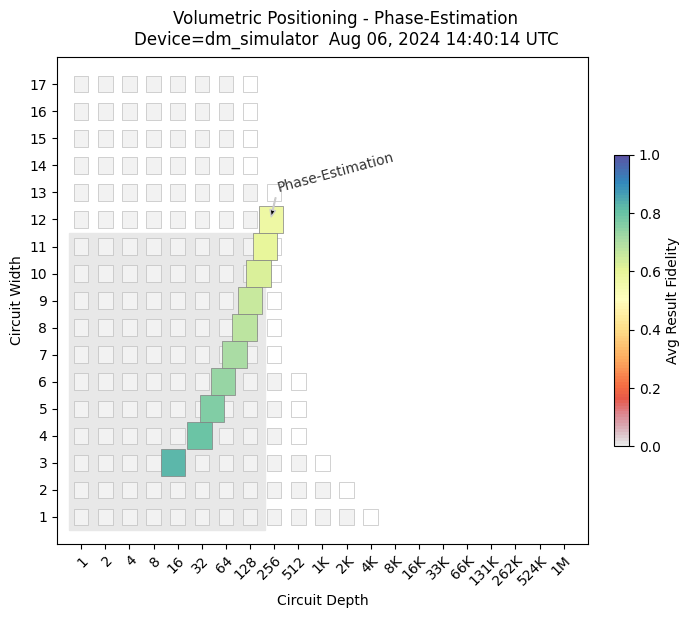

In [13]:
import sys
sys.path.insert(1, "phase-estimation/qsim")
import pe_benchmark
pe_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
               # hub=hub, group=group, project=project, 
                exec_options=exec_options)

### HHL Linear Solver

HHL Benchmark Program - QSim
... execution starting at Aug 06, 2024 14:40:14 UTC
DM_SIMULATOR
************
Executing 3 circuits with 4 qubits, using 1 input qubits and 1 clock qubits
ERROR: failed to execute result_handler for circuit 4 1006
... exception = division by zero
************
Executing 3 circuits with 5 qubits, using 1 input qubits and 2 clock qubits
ERROR: failed to execute result_handler for circuit 4 2006
... exception = division by zero
ERROR: failed to execute result_handler for circuit 4 3006
... exception = division by zero
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 11, 0.0
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 114, 0.307, 50.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.002, 0.35, 0.011 secs
Average Transpiling, Validating, Running Times for group 4 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 0, 0

************
Executing 3 

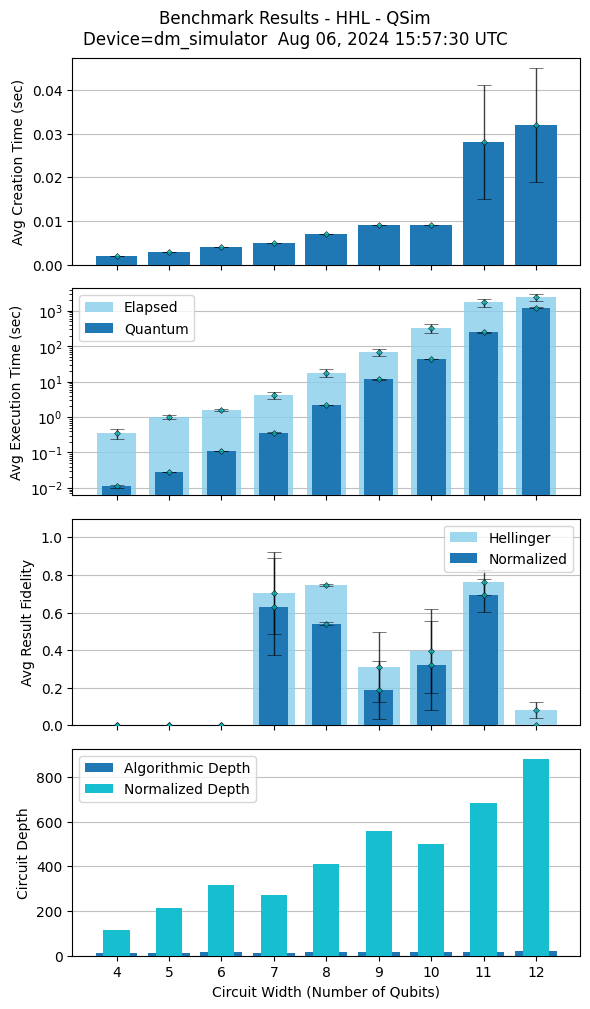

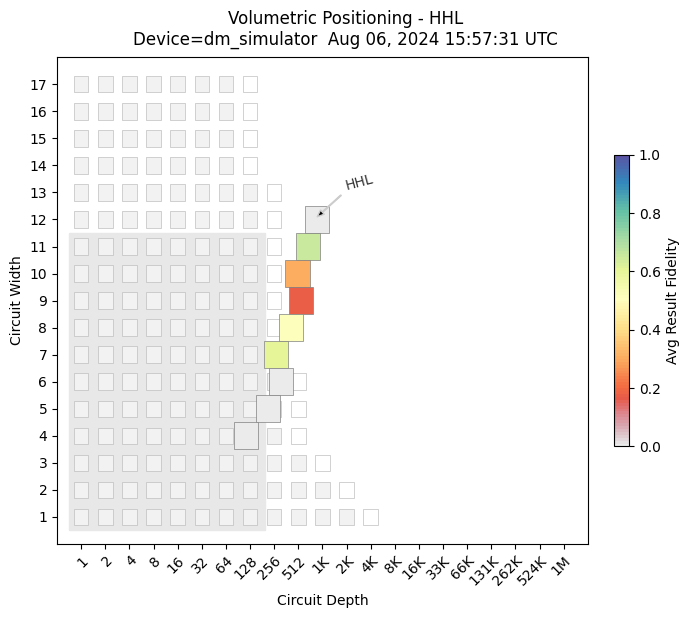

In [14]:
import sys
sys.path.insert(1, "hhl/qsim")
import hhl_benchmark

hhl_benchmark.verbose=False

hhl_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=1, use_best_widths=True,
                backend_id=backend_id, provider_backend=provider_backend,
               # hub=hub, group=group, project=project, 
                exec_options=exec_options)

### Amplitude Estimation

Amplitude Estimation Benchmark Program - QSim
INFO: Amplitude Estimation benchmark is limited to a maximum of 8 qubits.
... execution starting at Aug 06, 2024 15:57:32 UTC
DM_SIMULATOR
************
Executing [3] circuits with num_qubits = 4
************
Executing [3] circuits with num_qubits = 5
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 208, 0.432
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 165, 0.398, 84.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.006, 0.75, 0.032 secs
Average Transpiling, Validating, Running Times for group 4 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 0.935, 0.89

************
Executing [3] circuits with num_qubits = 6
************
Average Circuit Algorithmic Depth, ξ (xi) for the 5 qubit group = 479, 0.436
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 5 qubit group = 375, 0.404, 192.667
Average Creation, Elap

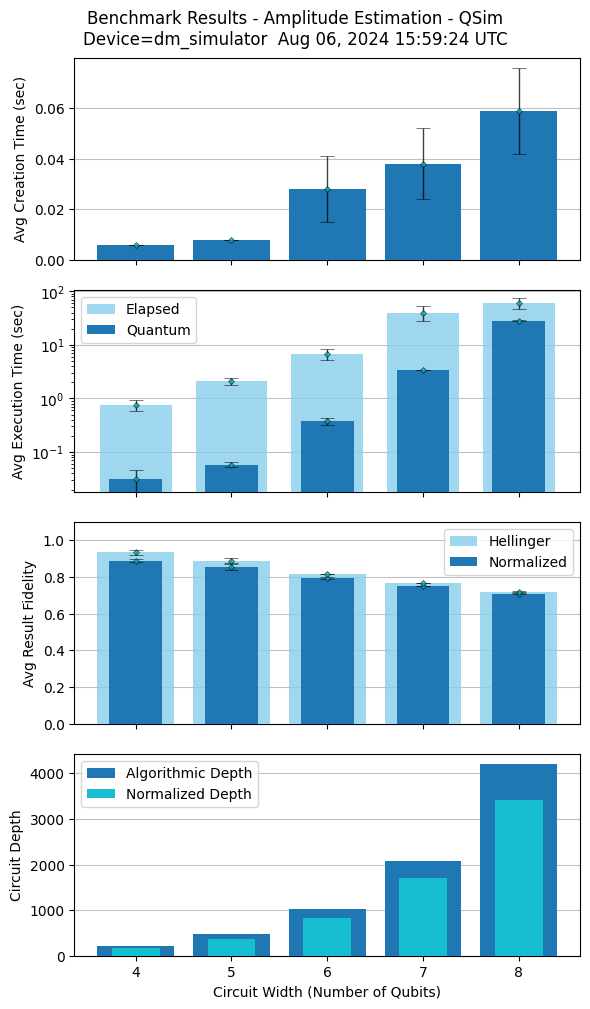

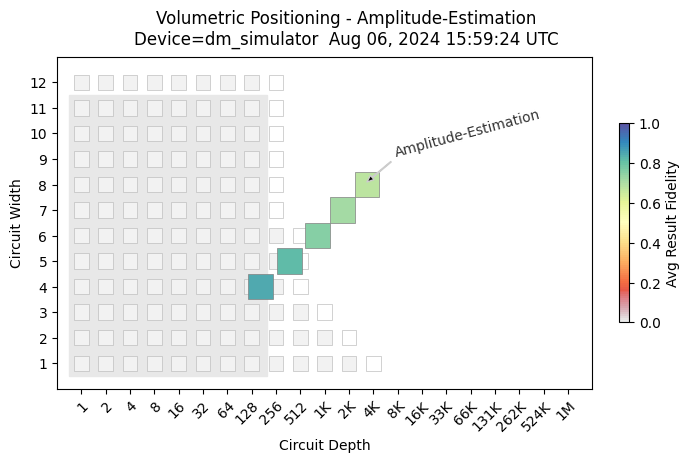

In [15]:
import sys
sys.path.insert(1, "amplitude-estimation/qsim")
import ae_benchmark
ae_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
               # hub=hub, group=group, project=project,
                exec_options=exec_options)

### Monte Carlo

Monte Carlo Sampling (2) Benchmark Program - QSim
INFO: Monte Carlo Sampling benchmark is limited to a maximum of 10 qubits.
... execution starting at Aug 06, 2024 15:59:25 UTC
DM_SIMULATOR
************
Executing [3] circuits with num_qubits = 4
************
Executing [3] circuits with num_qubits = 5
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 202, 0.398
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 208, 0.372, 96.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.007, 0.816, 0.017 secs
Average Transpiling, Validating, Running Times for group 4 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 0.952, 0.904

************
Executing [3] circuits with num_qubits = 6
************
Average Circuit Algorithmic Depth, ξ (xi) for the 5 qubit group = 468, 0.401
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 5 qubit group = 479, 0.377, 224.0
Average Creation,

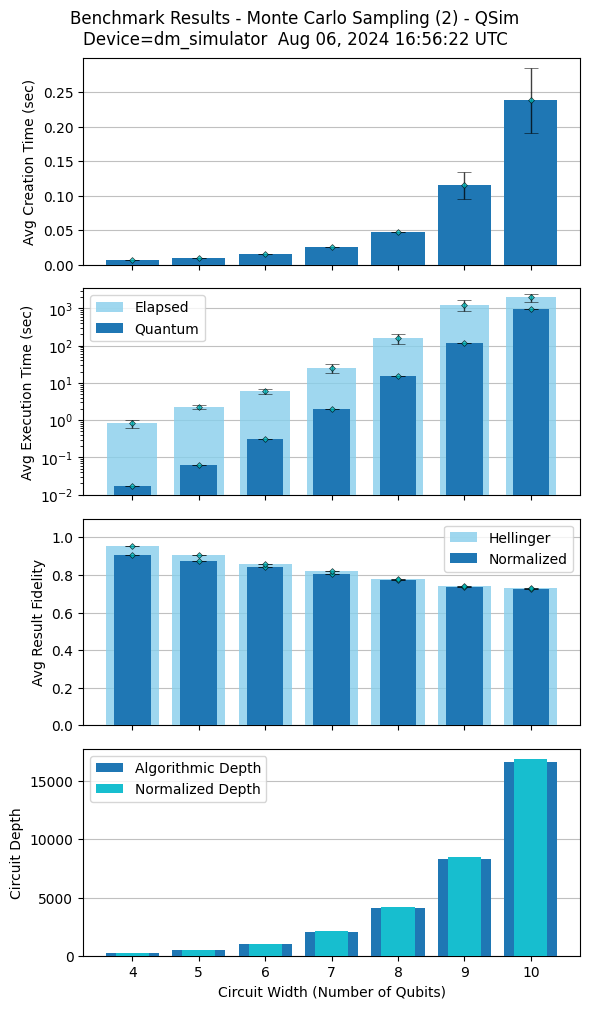

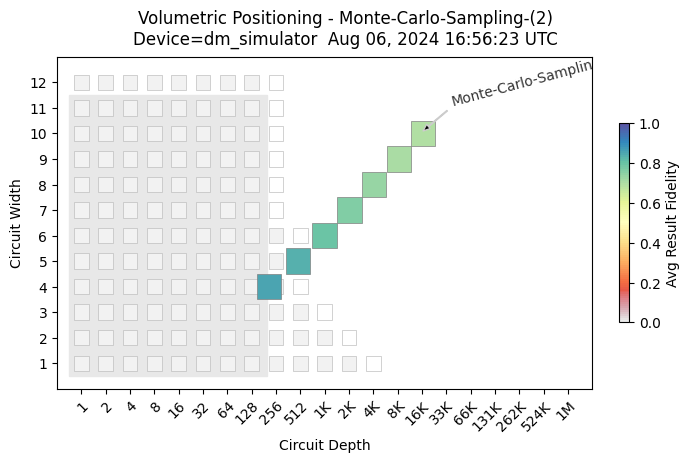

In [16]:
import sys
sys.path.insert(1, "monte-carlo/qsim")
import mc_benchmark
mc_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
               # hub=hub, group=group, project=project, 
                exec_options=exec_options)

### Hamiltonian Simulation

Hamiltonian Simulation Benchmark Program - QSim
... execution starting at Aug 06, 2024 16:56:23 UTC
DM_SIMULATOR
************
Executing [3] circuits with num_qubits = 2
************
Executing [3] circuits with num_qubits = 3
************
Average Circuit Algorithmic Depth, ξ (xi) for the 2 qubit group = 29, 0.243
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 2 qubit group = 29, 0.243, 9.0
Average Creation, Elapsed, Execution Time for the 2 qubit group = 0.001, 0.168, 0.001 secs
Average Transpiling, Validating, Running Times for group 2 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 2 qubit group = 0.91, 0.877

************
Executing [3] circuits with num_qubits = 4
************
Average Circuit Algorithmic Depth, ξ (xi) for the 3 qubit group = 44, 0.265
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 3 qubit group = 44, 0.265, 18.0
Average Creation, Elapsed, Execution Time for the 3 qubit group = 0.001, 0.544, 0.003 secs
Average Tr

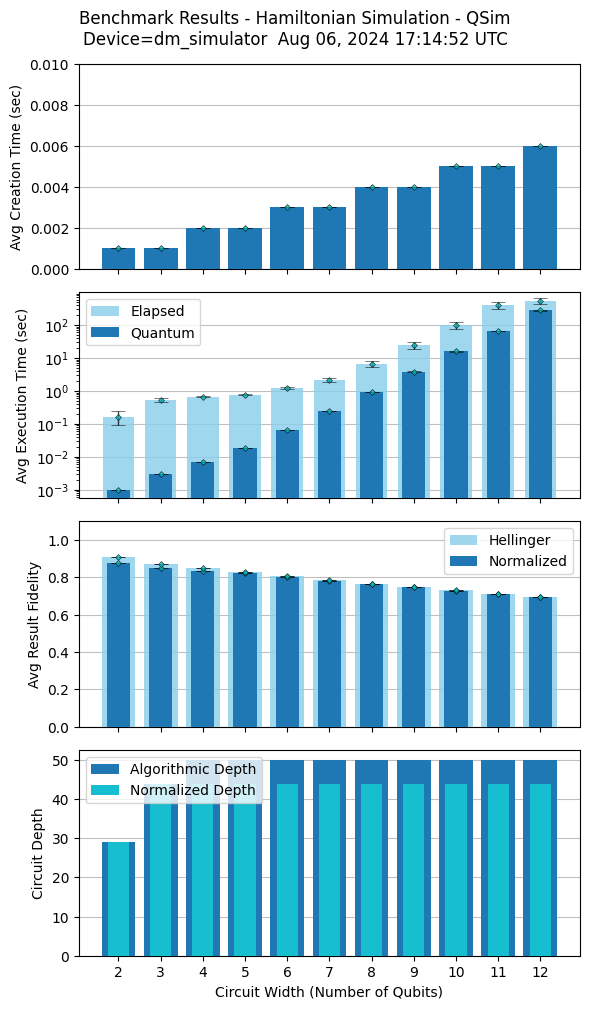

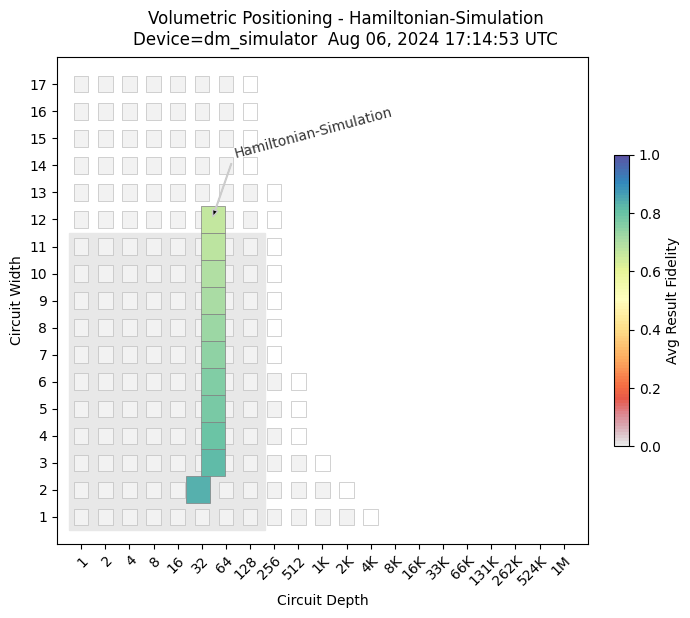

In [17]:
import sys
sys.path.insert(1, "hamiltonian-simulation/qsim")
import hamiltonian_simulation_benchmark
hamiltonian_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
               # hub=hub, group=group, project=project, 
                exec_options=exec_options)

### VQE - Method 1

VQE Simulation (1) Benchmark Program - QSim
... execution starting at Aug 06, 2024 17:14:53 UTC
DM_SIMULATOR
************
Executing [3] circuits with num_qubits = 4
************
Executing [3] circuits with num_qubits = 6
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 5, 0.0
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 76, 0.533, 56.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.113, 0.584, 0.009 secs
Average Transpiling, Validating, Running Times for group 4 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 0.82, 0.781

************
Executing [3] circuits with num_qubits = 8
************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 10, 0.0
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 341, 0.63, 272.0
Average Creation, Elapsed, Execution Time for the 6 qubit group = 0.261, 10.777, 0.154 secs
Average Transpil

/home/cdac/Desktop/QSim_Repo/QC_Benchmarks_using_dm-simulator/_common/qsim/metrics.py:686: RuntimeWarning: invalid value encountered in sqrt
  total += (np.sqrt(val) - np.sqrt(q_normed[key]))**2


************
Average Circuit Algorithmic Depth, ξ (xi) for the 12 qubit group = 101, 0.0
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 12 qubit group = 9928, 0.763, 8640.0
Average Creation, Elapsed, Execution Time for the 12 qubit group = 0.212, 42236.061, 20871.177 secs
Average Transpiling, Validating, Running Times for group 12 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 12 qubit group = nan, nan

... execution complete at Aug 07, 2024 11:00:32 UTC in 63939.021 secs

Sample Circuit:
          ┌─────┐┌────────────────────┐┌────────────────────┐»
q20186_0: ┤0    ├┤0                   ├┤0                   ├»
          │     ││                    ││                    │»
q20186_1: ┤1    ├┤1                   ├┤1                   ├»
          │  Hf ││  Cluster Op (0, 1) ││  Cluster Op (2, 3) │»
q20186_2: ┤2    ├┤2                   ├┤2                   ├»
          │     ││                    ││                    │»
q20186_3: ┤3    ├┤3    

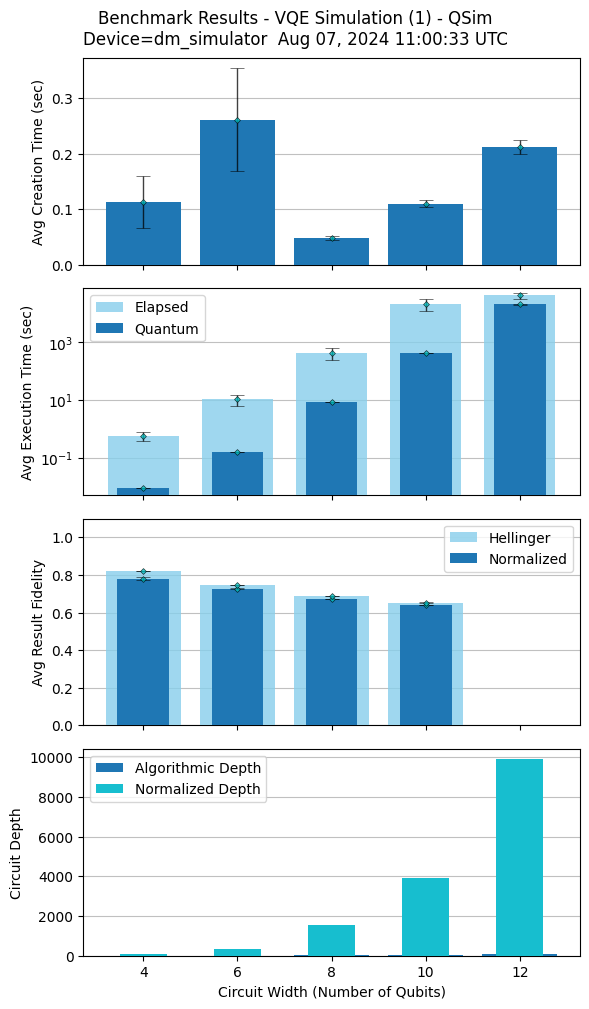

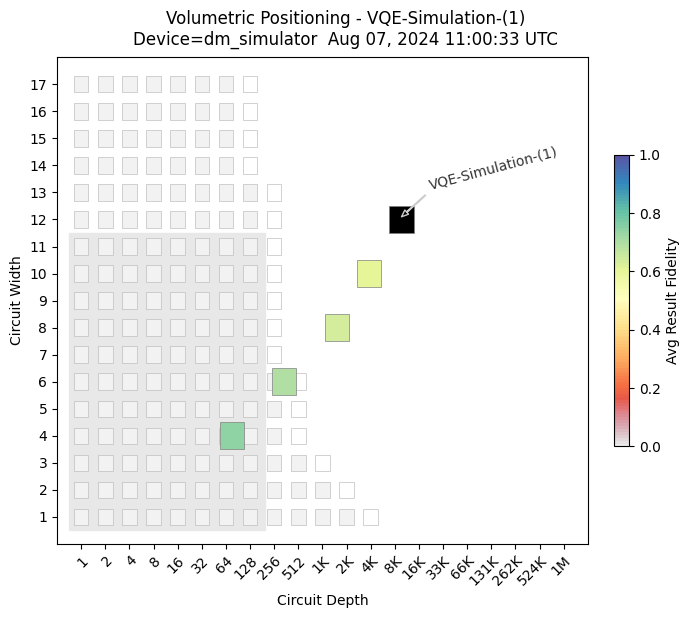

In [18]:
import sys
sys.path.insert(1, "vqe/qsim")
import vqe_benchmark
vqe_num_shots=4098
vqe_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits,
                max_circuits=max_circuits, num_shots=vqe_num_shots,
                method=1,
                backend_id=backend_id, provider_backend=provider_backend,
               # hub=hub, group=group, project=project, 
                exec_options=exec_options)

### Shor - Method 1

Shor's Order Finding (1) Benchmark - QSim
... execution starting at Aug 07, 2024 11:00:34 UTC
DM_SIMULATOR
************
Executing [1] circuits with num_qubits = 10
************
Average Circuit Algorithmic Depth, ξ (xi) for the 10 qubit group = 904, 0.536
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 10 qubit group = 2732, 0.425, 1644.0
Average Creation, Elapsed, Execution Time for the 10 qubit group = 0.431, 447.039, 446.383 secs
Average Transpiling, Validating, Running Times for group 10 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 10 qubit group = 0.845, 0.823

... execution complete at Aug 07, 2024 11:08:03 UTC in 449.119 secs

Sample Circuit:
          ┌───┐ ░                                ┌──────────┐ ░ ┌──────────┐┌─┐»
q21261_0: ┤ H ├─░────────────────────────────────┤0         ├─░─┤0         ├┤M├»
          ├───┤ ░                     ┌─────────┐│          │ ░ │          │└╥┘»
q21261_1: ┤ H ├─░─────────────────────┤0        ├┤       

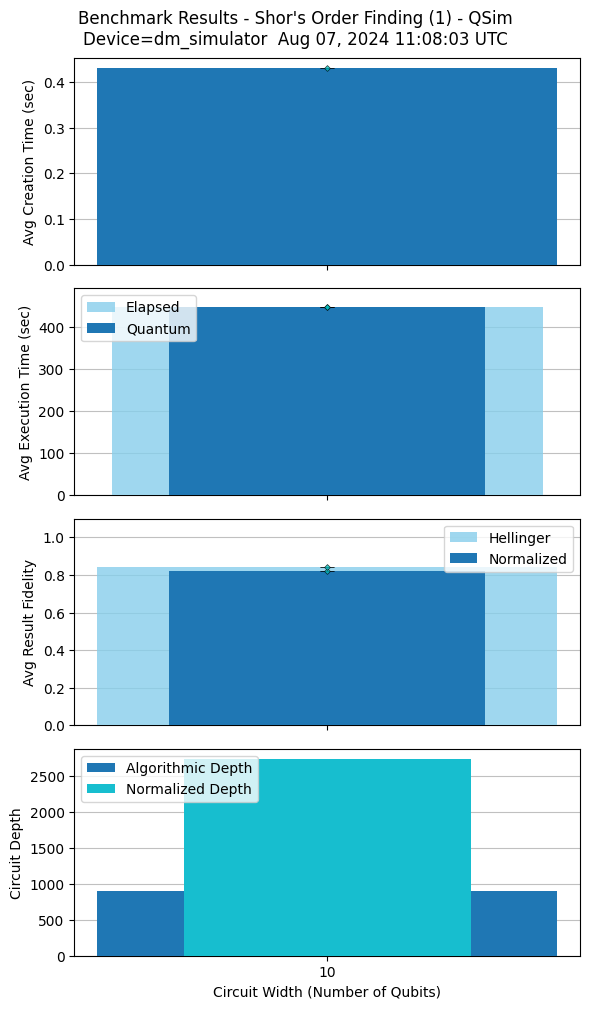

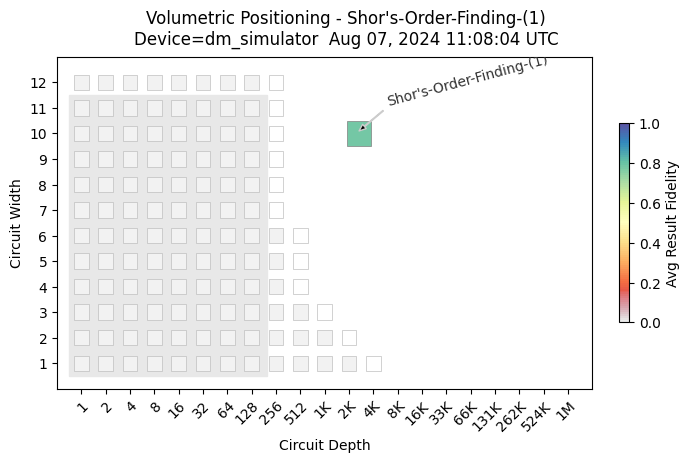

In [19]:
import sys
sys.path.insert(1, "shors/qsim")
import shors_benchmark
shors_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=1, num_shots=num_shots,
                method=1,
                backend_id=backend_id, provider_backend=provider_backend,
               # hub=hub, group=group, project=project, 
                exec_options=exec_options)

### Shor - Method 2

In [20]:
# import sys
# sys.path.insert(1, "shors/qsim")
# import shors_benchmark
# shors_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=1, num_shots=num_shots,
#                 method=2,
#                 backend_id=backend_id, provider_backend=provider_backend,
#                # hub=hub, group=group, project=project,
#                 exec_options=exec_options)

Shor's Order Finding (2) Benchmark - QSim
... execution starting at Aug 07, 2024 11:08:05 UTC
DM_SIMULATOR
************
Executing [1] circuits with num_qubits = 7
ERROR: Failed to execute circuit 7 (3, 2)
... exception = 'QasmQobjInstruction' object has no attribute 'qubits'
************
Executing [1] circuits with num_qubits = 9
ERROR: Failed to execute circuit 9 (6, 2)
... exception = 'QasmQobjInstruction' object has no attribute 'qubits'
************
Executing [1] circuits with num_qubits = 11
ERROR: Failed to execute circuit 11 (13, 3)
... exception = 'QasmQobjInstruction' object has no attribute 'qubits'
... execution complete at Aug 07, 2024 11:08:30 UTC in 25.868 secs

Sample Circuit:
                ░  ┌───┐ ┌───┐┌──────────┐┌──────┐┌───┐┌─┐┌─┐ ░  ┌───┐ ┌───┐»
  q21540: ──────░──┤ X ├─┤ H ├┤0         ├┤ P(0) ├┤ H ├┤M├┤M├─░──┤ X ├─┤ H ├»
          ┌───┐ ░  └─╥─┘ └───┘│          │└──╥───┘└───┘└╥┘└╥┘ ░  └─╥─┘ └───┘»
q21541_0: ┤ X ├─░────╫────────┤1         ├───╫──────────╫──╫──░──

### Combined Benchmark Results

****** NO RESULTS for Shor's Order Finding (2) ****** 


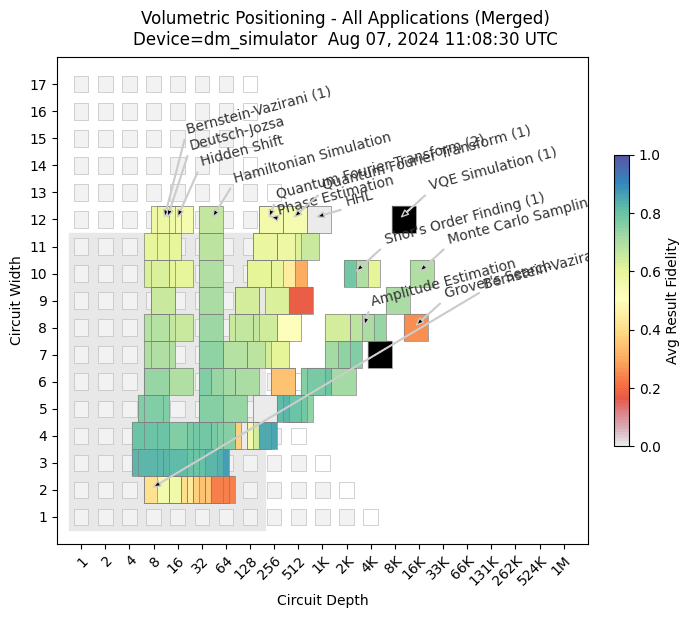

In [21]:
import sys
sys.path.insert(1, "_common/qsim")
import metrics

# metrics.depth_base = 2
# metrics.QV = 0
# apps = [ "Hidden Shift", "Grover's Search", "Quantum Fourier Transform (1)", "Hamiltonian Simulation" ]
# backend_id='qasm_simulator'

metrics.plot_all_app_metrics(backend_id, do_all_plots=False, include_apps=None)